In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


In [7]:
# Load the SMOTE-balanced training set and original test set
X_train = pd.read_csv("../data/X_train_sm.csv")
y_train = pd.read_csv("../data/y_train_sm.csv").squeeze()

X_test = pd.read_csv("../data/X_test.csv")
y_test = pd.read_csv("../data/y_test.csv").squeeze()

# Check shapes
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


X_train: (8260, 30), y_train: (8260,)
X_test: (1407, 30), y_test: (1407,)


## 🔧 Hyperparameter Tuning - Random Forest

We'll use `GridSearchCV` to find the best parameters for the `RandomForestClassifier`.  
Scoring Metric: F1 Score (Macro Average)


In [8]:
# Define model and parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Perform grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_macro', verbose=2)

## 🧠 Evaluation of the Tuned Random Forest Model

Let's evaluate the best model returned by GridSearchCV using the test set.


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1033
           1       0.56      0.60      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407



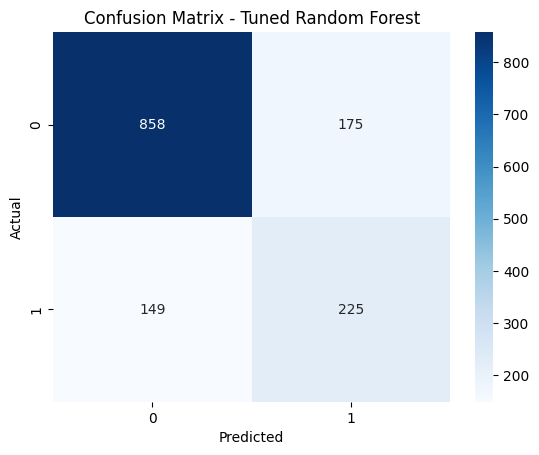

In [9]:
# Best estimator and its parameters
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


## 💾 Saving the Tuned Random Forest Model

We’ll now save the best performing Random Forest model for deployment via Streamlit.


In [12]:

# Save model
joblib.dump(best_model, "../models/random_forest_best.pkl")
print("Model saved successfully!")


Model saved successfully!


## ✅ Day 4 Summary

- Loaded processed and balanced data from Day 2.
- Performed train-test split.
- Applied GridSearchCV on Random Forest for hyperparameter tuning.
- Evaluated the tuned model using F1-score and confusion matrix.
- Saved the best model as `random_forest_best.pkl` in the `models/` folder.


In [13]:
# Save classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
with open("../outputs/classification_report.txt", "w") as f:
    f.write(report)
